<a href="https://colab.research.google.com/github/felipefcunica/cogroo4py/blob/master/Scripts/Intro_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports&Confgs


In [1]:
!python -m spacy download pt

     |████████████████████████████████| 21.2 MB 8.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [2]:
import pandas as pd
import numpy as np
import spacy
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from spacy.lang.pt.stop_words import STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.manifold import MDS
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
stop_words = STOP_WORDS
#incluir stopwords
pln = spacy.load('pt')
pln.Defaults.stop_words |= {"possuir","se", "fato", "modo", "e","o" ,"a","r","d",
                            "algum","uma", "haver","outro","s","n", "desssa",
                            "desse","dessas","desses", "seja","uso", "fato",
                            "será", "muita", "visto", "outro", "maneira", "d",
                            "n", "há", "seja", "muitas", "fica", "si", "passar",
                            "á", "ficar", "causou", "passando", "passou", "perante",
                            "alguém", "terá", "poucos", "tornou", "podendo", "tenham",
                            "ocorre", "voltar", "todavia", "dando", "eram", "tantos",
                            "conseguinte", "necessário", "devido","havia", "feito",
                            "tinha", "faria", "poderiam", "tê", "lo", "ninguém","sendo",
                            "entretanto", "apesar", "melhor", "teriam", "mesma", "colocam",
                            "haver", "s", "leva", "levar"}
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 15))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

# Funções

In [7]:
def preprocessamento(text):
    result = []
    pos_tag = ['ADJ', 'NOUN', 'VERB', 'PROPN'] # escolhendo apenas adjetivos, substantivos e verbos , 'VERB'
    texto = re.sub(u'\.|,|:|;|!|\?|\(|\)|\||\+|\'|\"|‘|’|“|”|\'|\’|…|\-|–|—|\$|&|\*|>|<|\/|\[|\]', '', text )
    doc = pln(texto.lower()) # Transformando em minúsculo
    for token in doc:
        # 3
        if(token.text in stop_words):
            continue
        # 4
        if(token.pos_ in pos_tag):
            result.append(token.text)
                
        texto = ' '.join([str(elemento) for elemento in result if not elemento.isdigit()]) 
         
                
    #return result # 5
    return texto # 5

In [18]:
def doc_vector(listDoc,DictVect,agreg='sum'):
  resD = []
  for i in listDoc:
    resVec = np.zeros(shape=50)
    vectLis = []
    for j in i:
      if j in DictVect.keys():
        vectLis.append(DictVect.get(j))

    if agreg == 'sum': #agregado por soma
      for h in vectLis:
        for v in range(len(resVec)):
          resVec[v]=(float(resVec[v])+float(h[v]))
      resD.append(resVec)
      
    elif agreg == 'dif': #agregado pela diferença
      for h in vectLis:
        for v in range(len(resVec)):
          resVec[v]=(float(resVec[v])-float(h[v]))
      resD.append(resVec)
  return resD

#Pré-processando e explorando textos

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Spell_AI/Data/bases/Intro_base.xlsx - Planilha1 (2).csv')
df.columns

Index(['Introduções', 'tema', 'erro', '1 bom 0 não ficou legal', 'tipo',
       'citacao', 'historico', 'constituicao', 'descricao', 'pergunta',
       'comparacao', 'lei', 'definicao', 'nada'],
      dtype='object')

In [5]:
df.shape

(284, 14)

In [6]:
intros = df['Introduções'].tolist()

In [8]:
preprocessamento(intros[0])

'livro pé laranja lima josé vasconcelos retrata triste realidade zezé garoto vive situação alimentar risco filho pais recursos análogo conjuntura semelhante brasil causa desemprego salário mínimo nacional válido debate exposto medidas revertam cenário hodierno'

In [9]:
introsP = []
for i in tqdm(intros):
  introsP.append(preprocessamento(i))

100%|██████████| 284/284 [00:17<00:00, 16.17it/s]


In [10]:
corpus = ''
for i in intros:
  corpus+=f'{i} '

In [11]:
corpusP = preprocessamento(corpus)

In [12]:
wordcloud = WordCloud(width= 3000 , height = 2000, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(corpusP)

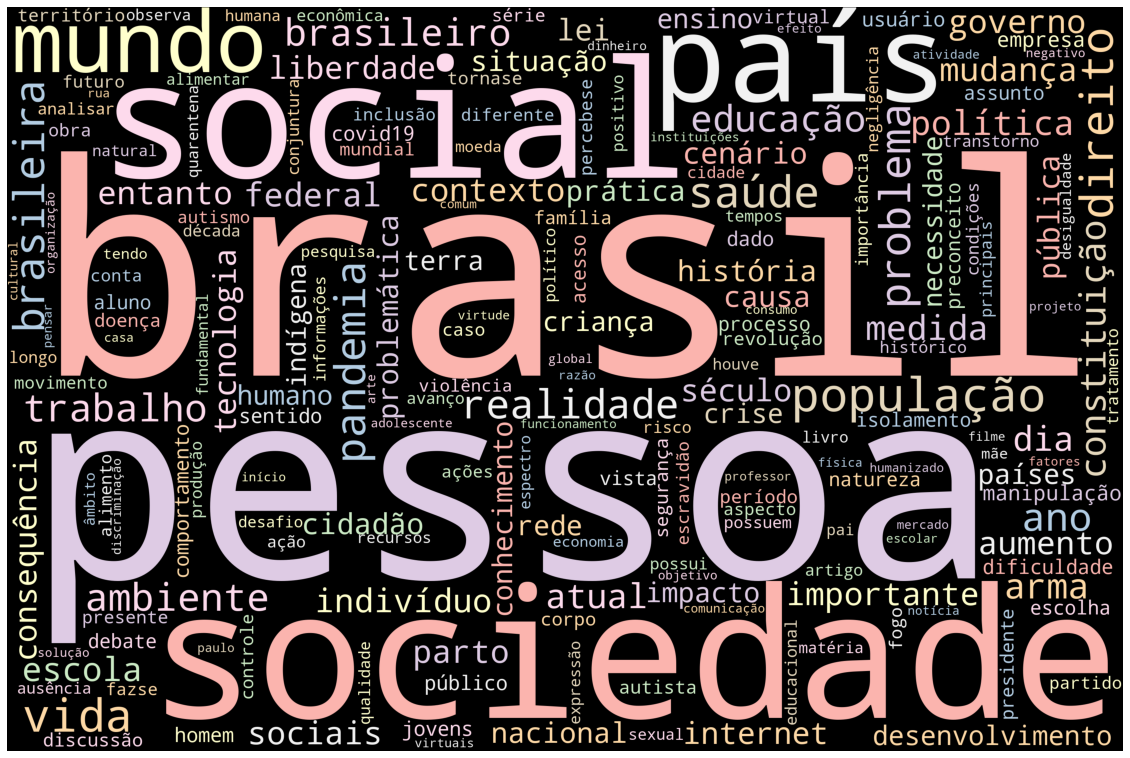

In [13]:
plot_cloud(wordcloud)

# Vetorizando

In [14]:
dVect = dict()
with open('/content/drive/MyDrive/Spell_AI/Data/modelos/glove_s50.txt') as vector:
  va = vector.readlines()
  for i in tqdm(va):
    varr = i.split(' ')
    dVect[varr[0]] = np.array(varr[1:])
  va,varr= 0,0

100%|██████████| 929606/929606 [00:11<00:00, 81550.85it/s]


In [15]:
dVect.get('que').tolist()[-1]

'-0.386656\n'

In [16]:
len(dVect.get('que'))

50

In [17]:
tes = preprocessamento(intros[0]).split()
print(tes)

['livro', 'pé', 'laranja', 'lima', 'josé', 'vasconcelos', 'retrata', 'triste', 'realidade', 'zezé', 'garoto', 'vive', 'situação', 'alimentar', 'risco', 'filho', 'pais', 'recursos', 'análogo', 'conjuntura', 'semelhante', 'brasil', 'causa', 'desemprego', 'salário', 'mínimo', 'nacional', 'válido', 'debate', 'exposto', 'medidas', 'revertam', 'cenário', 'hodierno']


In [19]:
resu = doc_vector(introsP,dVect,agreg='sum')

In [20]:
print(np.array(resu[0]))

[-1.08521290e+02 -1.11657604e+02 -7.20860170e+01 -7.12346904e+02
 -7.55015190e+01  1.40684222e+02  5.98173470e+01 -1.38831375e+02
  2.50792150e+01  7.64399300e+00  1.84591964e+02 -1.15238156e+02
 -3.39199550e+01  1.44665052e+02 -2.39043000e+01  4.21810470e+01
  1.06229340e+02  9.90670210e+01  6.72741640e+01 -5.50705800e+01
  1.41127523e+02  4.69504220e+01  1.00658593e+02 -1.88040878e+02
 -3.60358750e+01  2.92037810e+01 -5.24755230e+01  6.44065030e+01
 -6.24542930e+01  1.84683278e+02 -1.70449040e+01 -2.55294500e+00
  5.24970380e+01  5.87017280e+01  1.05279112e+02 -4.73701870e+01
 -4.48681910e+01 -9.68834190e+01 -1.78374168e+02  1.48935638e+02
  1.33099786e+02 -1.02797990e+02 -8.88120060e+01 -6.33336870e+01
 -9.61110300e+00  2.44010080e+01 -5.96168100e+01 -8.55045540e+01
 -1.43302238e+02  3.97195000e-01]


In [21]:
len(resu[0])

50

In [22]:
len(resu)

284

# Dividindo em teste e treino

In [185]:
y = df['nada'].tolist()
X = resu
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [186]:
print(X[0],y[0])

[-1.08521290e+02 -1.11657604e+02 -7.20860170e+01 -7.12346904e+02
 -7.55015190e+01  1.40684222e+02  5.98173470e+01 -1.38831375e+02
  2.50792150e+01  7.64399300e+00  1.84591964e+02 -1.15238156e+02
 -3.39199550e+01  1.44665052e+02 -2.39043000e+01  4.21810470e+01
  1.06229340e+02  9.90670210e+01  6.72741640e+01 -5.50705800e+01
  1.41127523e+02  4.69504220e+01  1.00658593e+02 -1.88040878e+02
 -3.60358750e+01  2.92037810e+01 -5.24755230e+01  6.44065030e+01
 -6.24542930e+01  1.84683278e+02 -1.70449040e+01 -2.55294500e+00
  5.24970380e+01  5.87017280e+01  1.05279112e+02 -4.73701870e+01
 -4.48681910e+01 -9.68834190e+01 -1.78374168e+02  1.48935638e+02
  1.33099786e+02 -1.02797990e+02 -8.88120060e+01 -6.33336870e+01
 -9.61110300e+00  2.44010080e+01 -5.96168100e+01 -8.55045540e+01
 -1.43302238e+02  3.97195000e-01] 0


In [187]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [188]:
len(X_train)

213

In [217]:
manifold = MDS(n_components=2, metric=True, n_init=4, max_iter=300,
                 eps=0.001, n_jobs=1, random_state=None,
                 dissimilarity='euclidean')

In [231]:
manifit = manifold.fit(X)
X_train_m = manifit.fit_transform(X_train)
X_test_m = manifit.fit_transform(X_test)

In [232]:
X_train_m.shape

(213, 2)

In [233]:
X_test_m.shape

(71, 2)

In [234]:
c0 = [i[0] for i in X_train_m]
c1 = [i[1] for i in X_train_m]

c0T = [i[0] for i in X_test_m]
c1T = [i[1] for i in X_test_m]

In [235]:
len(c0),len(c0T)

(213, 71)

In [236]:
df_train = pd.DataFrame(zip(c0,c1,y),columns=['c0','c1','nada'])
df_train

,c0,c1,nada
0,-361.605706,-390.281104,0
1,100.898351,168.258694,0
2,355.509200,330.898673,0
3,47.228599,-35.782140,0
4,548.018861,528.852504,0
...,...,...,...
208,-1465.210318,-1336.688400,0
209,66.392038,99.750188,0
210,67.052065,63.209749,0
211,-697.974217,-788.953594,0


In [237]:
df_test = pd.DataFrame(zip(c0T,c1T,y),columns=['c0','c1','nada'])
df_test

,c0,c1,nada
0,-141.902326,-67.099276,0
1,-358.597591,53.502349,0
2,171.970987,-86.886316,0
3,435.643873,-125.404072,0
4,-173.472157,-40.436465,0
...,...,...,...
66,401.165852,-80.120494,1
67,523.514352,-202.891397,1
68,-171.433547,-1.303300,1
69,-453.011631,107.801078,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


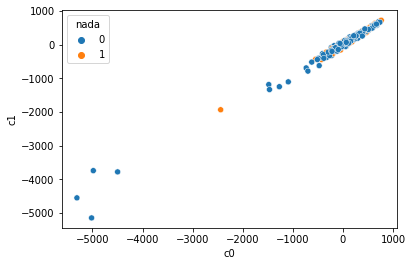

In [238]:
sns.scatterplot('c0','c1',data=df_train, hue='nada')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


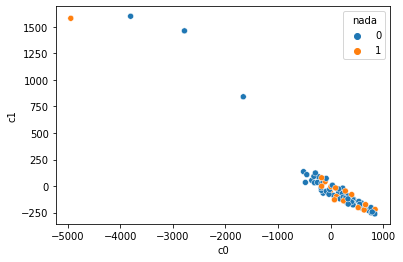

In [239]:
sns.scatterplot('c0','c1',data=df_test, hue='nada')

# Treinando com KNN

In [240]:
model = KNeighborsClassifier(n_neighbors=2,metric='manhattan',weights='distance',  algorithm='auto', metric_params=None)

In [241]:
model.fit(X_train_m,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')

In [242]:
y_pred = model.predict(X_test_m)
score = model.score(X_test_m, y_test)
print(score)
confusion_matrix(y_test,y_pred)

0.7323943661971831


array([[45, 16],
       [ 3,  7]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


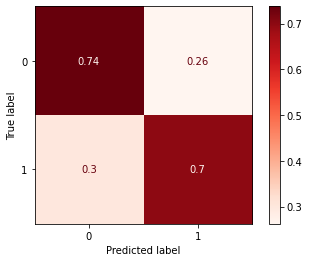

In [243]:
plot_confusion_matrix(model,X_test_m,y_test, cmap=plt.cm.Reds,normalize='true')

# Salvando modelo

In [244]:
import pickle

In [245]:
with open('/content/drive/MyDrive/Spell_AI/Data/bases/knn_intro_nada.pkl', 'wb') as file:
    pickle.dump(manifit, file)